### **US Weather Events (2016 - 2022)**  

**Description**  
This repository contains a comprehensive collection of weather events data across 49 states in the United States. The dataset comprises a staggering 8.6 million events, ranging from regular occurrences like rain and snow to extreme weather phenomena such as storms and freezing conditions.   
The data spans from January 2016 to December 2022 and is sourced from 2,071 airport-based weather stations nationwide. For more detailed information about the dataset, refer to the official dataset page.

https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events

In [29]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')


In [30]:
weather_events = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv')
weather_events.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [31]:
weather_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627181 entries, 0 to 8627180
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   EventId            object 
 1   Type               object 
 2   Severity           object 
 3   StartTime(UTC)     object 
 4   EndTime(UTC)       object 
 5   Precipitation(in)  float64
 6   TimeZone           object 
 7   AirportCode        object 
 8   LocationLat        float64
 9   LocationLng        float64
 10  City               object 
 11  County             object 
 12  State              object 
 13  ZipCode            float64
dtypes: float64(4), object(10)
memory usage: 921.5+ MB


In [32]:
weather_events['Type'].value_counts()

Type
Rain             5000794
Fog              2014190
Snow             1158575
Cold              232192
Precipitation     157186
Storm              61317
Hail                2927
Name: count, dtype: int64

In [33]:
weather_events['Severity'].value_counts()

Severity
Light       5149786
Severe      1729016
Moderate    1369115
Heavy        219151
UNK          157186
Other          2927
Name: count, dtype: int64

Can create own datetime format by using characters in string - '%Y-%m-%d %H:%M:%S'
%Y = year, %m = month, %d = day, %H = hour, %M = minute, %S = seconds
using format argument in pandas 'to_datetime' method allows for this.

In [34]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
weather_events['End']=pd.to_datetime(weather_events['EndTime(UTC)'], format=datetimeFormat)
weather_events['Start']=pd.to_datetime(weather_events['StartTime(UTC)'], format=datetimeFormat)
weather_events['Duration']=weather_events['End']-weather_events['Start']
weather_events['Duration'] = weather_events['Duration'].dt.total_seconds()
weather_events['Duration'] = weather_events['Duration'] / (60*60) # Converting to hours
weather_events = weather_events[(weather_events['Duration']< 30*24) & (weather_events['Duration'] > 0)] # More than 30 days or less than 0 hours discard.
weather_events.tail(3)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,End,Start,Duration
8627178,W-9091892,Cold,Severe,2022-12-21 23:53:00,2022-12-24 02:53:00,0.0,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0,2022-12-24 02:53:00,2022-12-21 23:53:00,51.0
8627179,W-9091893,Cold,Severe,2022-12-24 03:53:00,2022-12-24 07:53:00,0.0,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0,2022-12-24 07:53:00,2022-12-24 03:53:00,4.0
8627180,W-9091894,Cold,Severe,2022-12-24 09:53:00,2022-12-24 11:53:00,0.0,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0,2022-12-24 11:53:00,2022-12-24 09:53:00,2.0


In [35]:
# This dataframe contains all weather events. We want to filter those that aren't severe.
severe_data = weather_events.loc[weather_events['Severity']=='Severe']

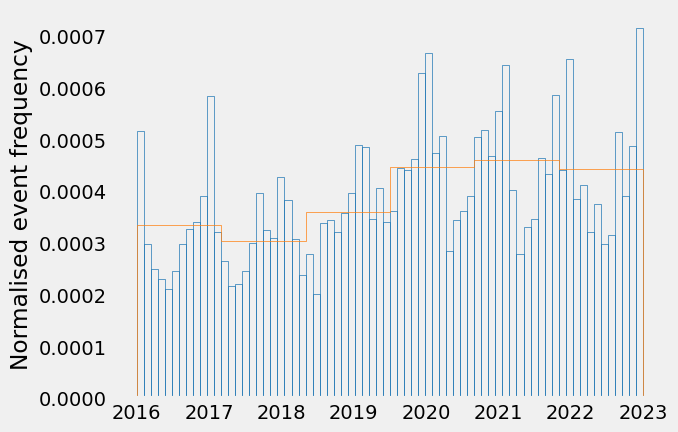

In [36]:
# We can quickly plot a histogram of the weather events as a function of time.

ax = plt.subplot()
severe_data['Start'].hist(bins=6*12, facecolor='none', edgecolor='tab:blue', grid=False, ax=ax, density=True)
severe_data['Start'].hist(bins=6, histtype='step', edgecolor='tab:orange', grid=False, ax=ax, density=True)
ax.set_ylabel("Normalised event frequency")
plt.show()

Using a bin per month shows the seasonality of severe weather events, whilst using a bin per year shows an increase in severe weather events in the past three years.

Types of severe weather:  ['Fog' 'Cold' 'Storm']


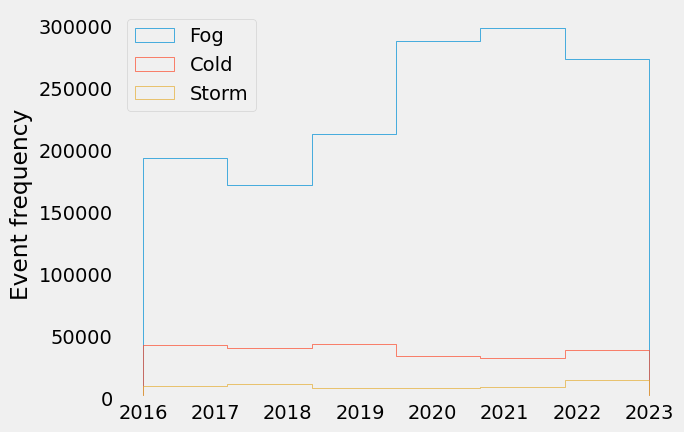

In [37]:
severe_types = severe_data['Type'].unique()
print("Types of severe weather: ", severe_types)

ax = plt.subplot()
for TYPE in severe_types:
    severe_data.loc[severe_data['Type']==TYPE]['Start'].hist(bins=6, histtype='step', grid=False, ax=ax, density=False, label=TYPE)
ax.legend(loc=2)
ax.set_ylabel("Event frequency")
plt.show()

The above histogram shows that the increase in severe weather events is primarily coming from an increase in severe fog events. Such a sharp increase suggests there might have been a change in what defines severe fog, but there is the possibilty we have recently entered a 'fog age'!

Categorizing Region
Was curious to see how the differences are between geographical regions of the US on top of just states, to get an overarchiving theme of the relative living conditions for weather for a specific region.

In [38]:
df2 = weather_events.groupby(['AirportCode','City','State', 
                  'LocationLat', 'LocationLng','Type', 'Severity']).agg({'Duration':['sum']}).reset_index()
df2.columns = pd.MultiIndex.from_tuples((("AirportCode", " "),("City", " "),
                                         ("State", " "), ("LocationLat", " "),
                                         ("LocationLng", " "), ("Type", " "), ("Severity", " "),
                                         ("Duration", " ")))
df2.columns = df2.columns.get_level_values(0)
df2['Duration'] = df2['Duration'] / (24*6*3.65) # Yearly Percentage
df2 = df2.sort_values(by='Duration')
df2.tail(3)

,AirportCode,City,State,LocationLat,LocationLng,Type,Severity,Duration
13821,KMWN,Sargents,NH,44.2708,-71.3035,Fog,Severe,20.691591
14281,KNRS,Imperial Beach,CA,32.5630,-117.1109,Cold,Severe,23.987538
13825,KMWN,Sargents,NH,44.2708,-71.3035,Storm,Severe,54.066432


In [39]:
south = ['AL', 'GA', 'FL', 'SC', 'NC', 'TN', 'MS', 'LA', 'AR', 'OK', 'TX']
atlantic = ['KY', 'VA', 'WV', 'MD', 'DE', 'PA', 'NJ']
new_england = ['NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']
midwest = ['OH', 'IN', 'MI', 'IL', 'WI', 'IA', 'MO', 'MN', 'NE', 'KS', 'SD', 'ND']
west = ['MT', 'WY', 'ID', 'NV', 'UT', 'CO', 'AZ', 'NM']
pacific = ['AK', 'WA', 'OR', 'CA', 'HI']
df2.loc[df2['State'].isin(south), 'Region'] = 'South'
df2.loc[df2['State'].isin(atlantic), 'Region'] = 'Atlantic'
df2.loc[df2['State'].isin(new_england), 'Region'] = 'New England'
df2.loc[df2['State'].isin(midwest), 'Region'] = 'Midwest'
df2.loc[df2['State'].isin(west), 'Region'] = 'West'
df2.loc[df2['State'].isin(pacific), 'Region'] = 'Pacific'
df2 = df2[['AirportCode', 'City', 'State', 'Region', 'LocationLat', 'LocationLng', 'Type', 'Severity', 'Duration']]
df2.tail(3)

,AirportCode,City,State,Region,LocationLat,LocationLng,Type,Severity,Duration
13821,KMWN,Sargents,NH,New England,44.2708,-71.3035,Fog,Severe,20.691591
14281,KNRS,Imperial Beach,CA,Pacific,32.5630,-117.1109,Cold,Severe,23.987538
13825,KMWN,Sargents,NH,New England,44.2708,-71.3035,Storm,Severe,54.066432


**Distribution of Weather Event Prone States**

Text(0, 0.5, '')

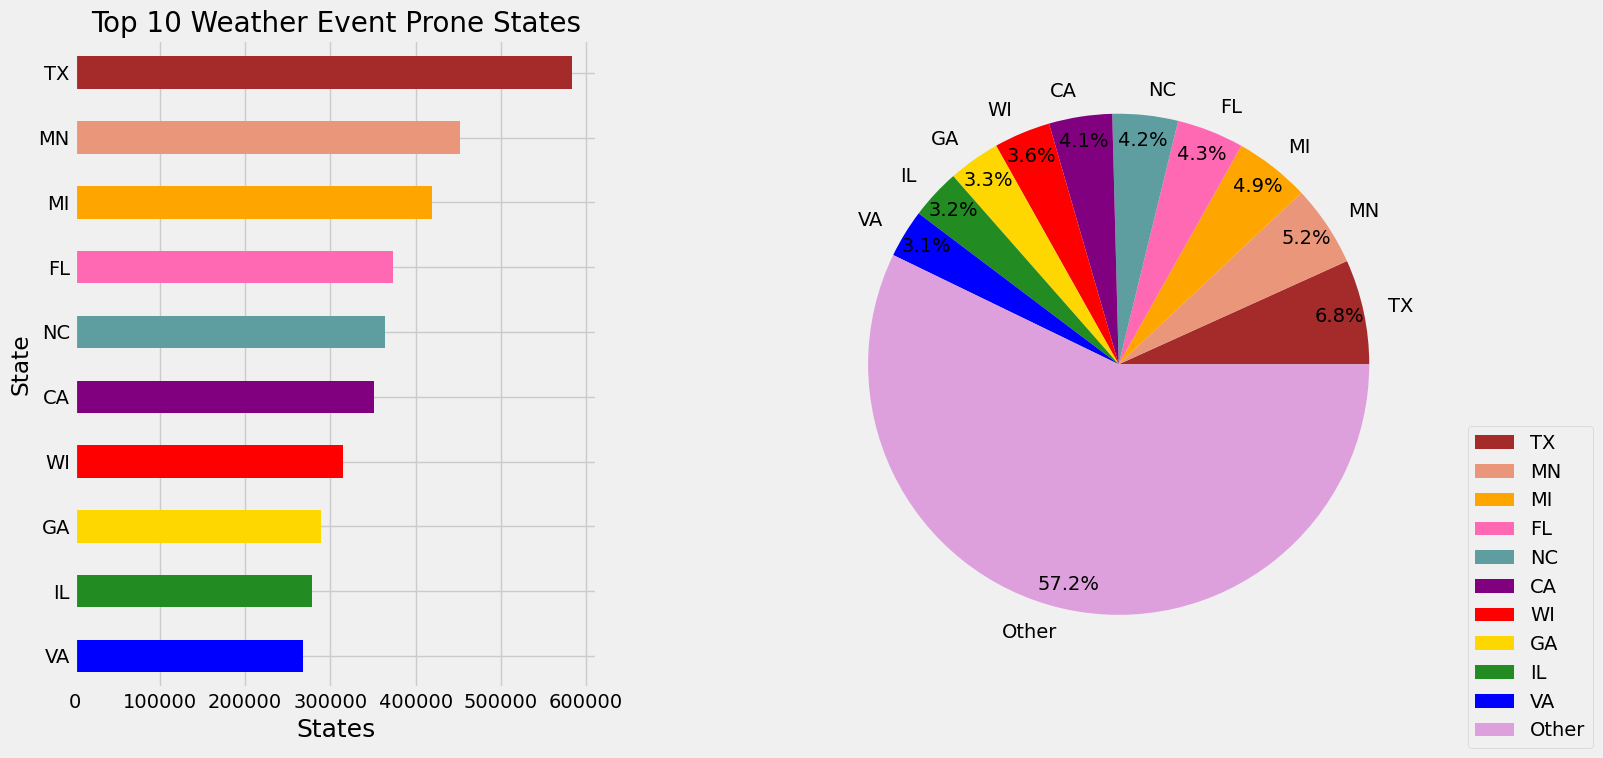

In [40]:



fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
weather_events.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Weather Event Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=weather_events['State'].value_counts()
groups=list(weather_events['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

We move onto to doing some basic plotting with GeoPandas. We start by loading a shape file that contains the US state boundaires as polygons.

In [41]:
states = gpd.read_file("./us_state_shp/cb_2016_us_state_500k.shp")

we define a second dataframe with some states removed.

In [42]:
cut_states = states.loc[(states['NAME']!='Alaska') &
                        (states['NAME']!='Hawaii') &
                        (states['NAME']!='Commonwealth of the Northern Mariana Islands') & 
                        (states['NAME']!='United States Virgin Islands') &
                        (states['NAME']!='Guam') &
                        (states['NAME']!='American Samoa') &
                        (states['NAME']!='Puerto Rico')]

Next we convert our pandas dataframe into a GeoPanda dataframe. Doing this will make plotting a bit more convenient.

In [43]:
severe_gdf = gpd.GeoDataFrame(severe_data, geometry=gpd.points_from_xy(severe_data['LocationLng'], severe_data['LocationLat']))
severe_gdf.crs = {'init':'epsg:4269'}

c:\Users\hp\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [44]:
def make_year_mask(year):
    '''
    Function for selecting elements from a specified year.
    Elements that occured in the range ``year``-01-01 00:00:00 to ``year``-12-31 23:59:59 will be included.
    
    Args:
        year (int) : The desired year.
        
    Returns:
        Boolean mask for the ``severe_data`` dataframe.
    '''
    return (severe_data['Start']>datetime.datetime(year,1,1,0,0,0)) &\
           (severe_data['Start']<datetime.datetime(year,12,31,23,59,59))
    



Choropleth maps can make things a bit clearer, with these maps an enitre region is summarised by a single number, in this case this would be the sum of weather events in a given state.

We will again be plotting the maps for a given year as we did above. We will now include all severe weather events, not just storms. In the plots that will follow the states will be coloured by the number of weather events that happened in that state in a given year. To allow us to compare the maps from different years we need to make sure we use a consistent colour map. So before plotting the maps we calculate what the maximum number of state-wide weather events.

In [45]:
state_wide_max = 0
for year in range(2016,2022):
    mask = (severe_data['Start']>datetime.datetime(year,1,1,0,0,0)) &\
           (severe_data['Start']<datetime.datetime(year,12,31,23,59,59))
    
    year_max = max(severe_gdf.loc[mask]['State'].value_counts())
    
    if year_max>state_wide_max:
        state_wide_max=year_max

Now we loop over the years and make the Choropleth maps!

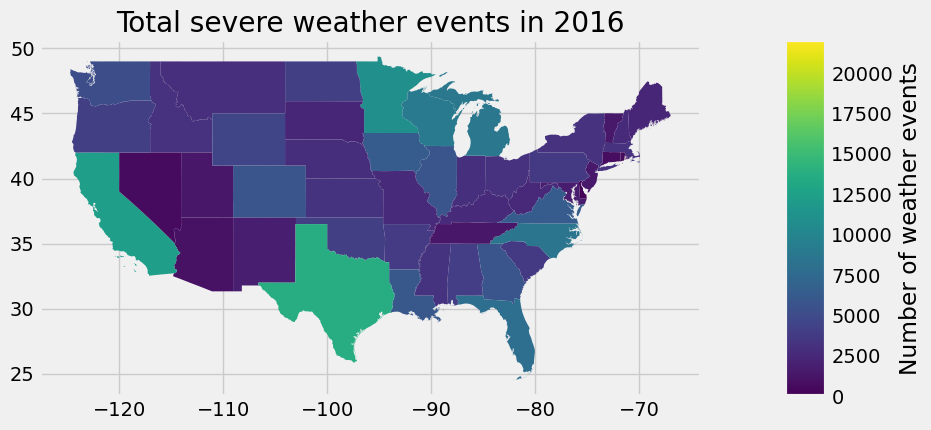

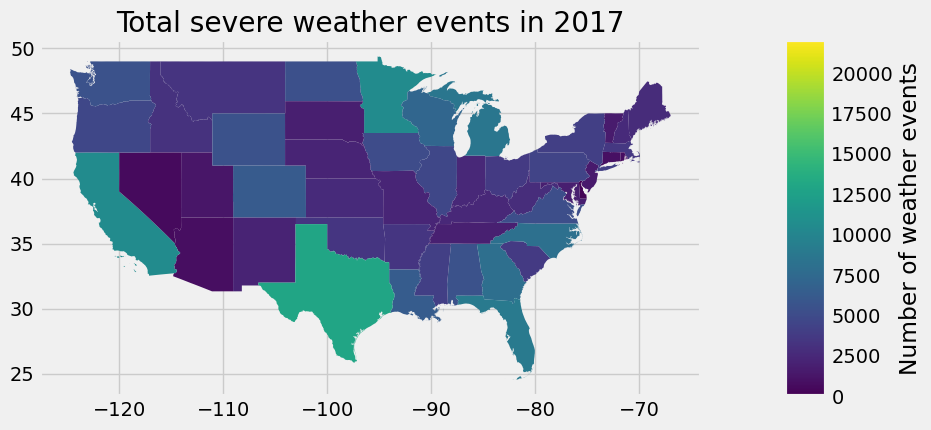

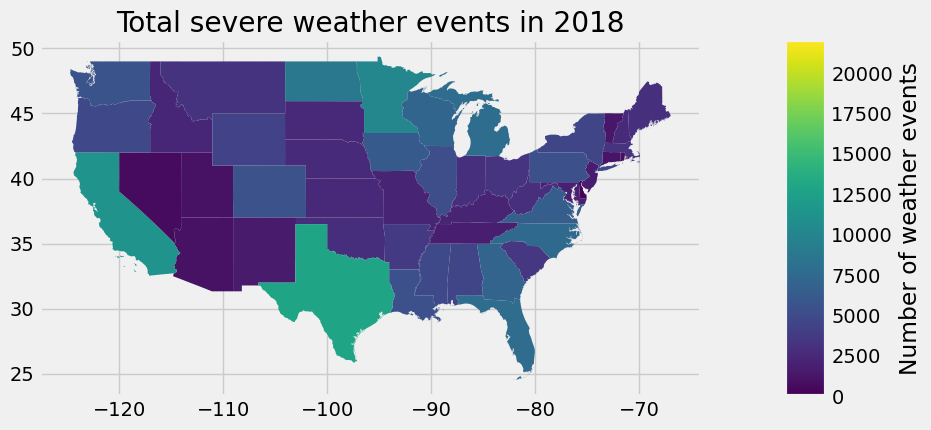

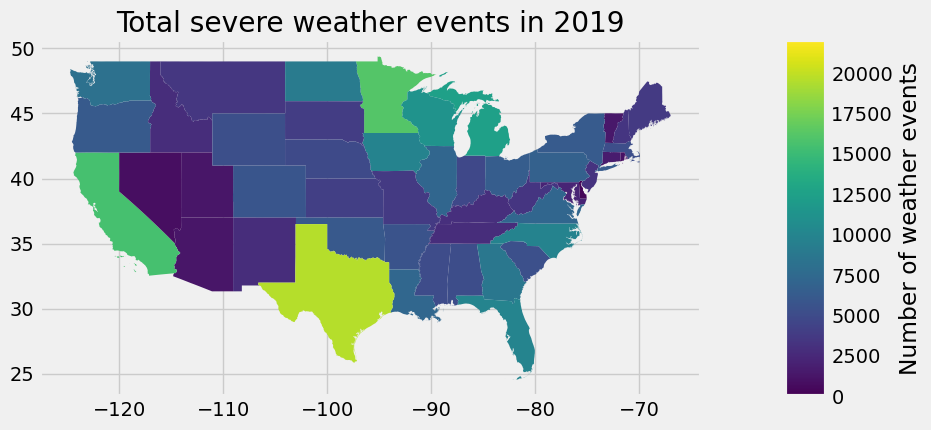

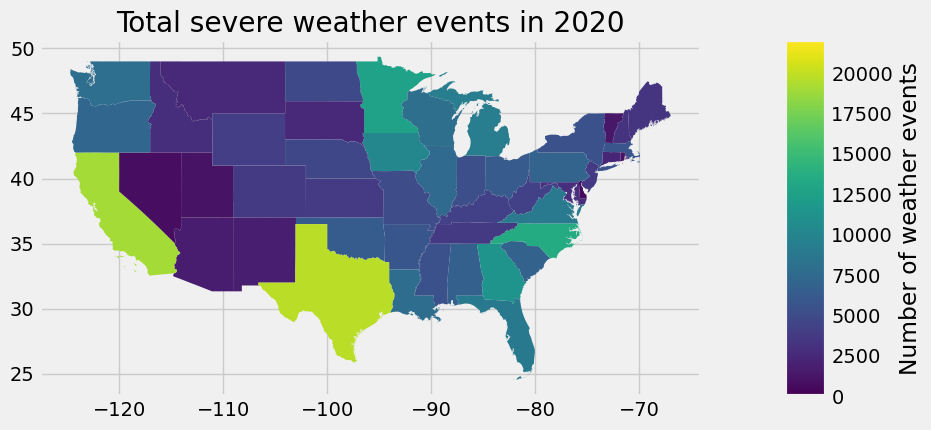

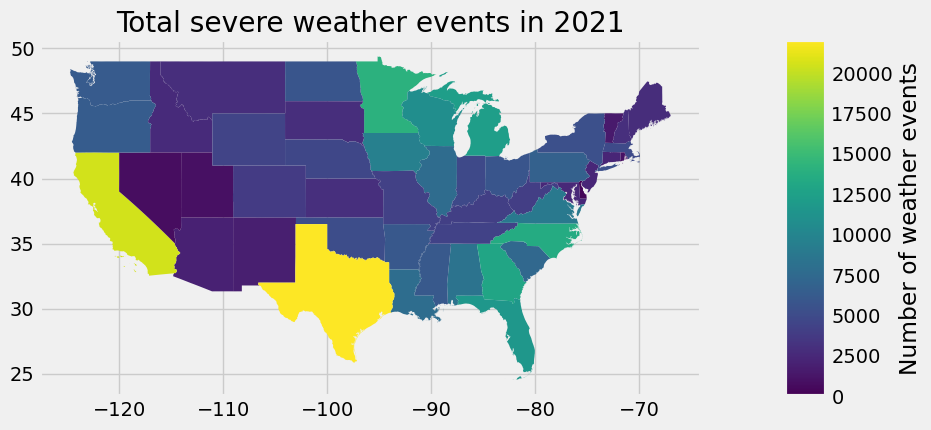

In [46]:
for year in range(2016,2022):
    mask = make_year_mask(year)
    
    counts = severe_gdf.loc[mask]['State'].value_counts()
    
    fig, ax = plt.subplots(1,1, figsize=(10,12))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.01)
    cut_states.join(counts.to_frame(name='count'), on='STUSPS').plot(column='count', legend=True, ax=ax, cax=cax, 
                                                                     legend_kwds={'label': "Number of weather events"}, 
                                                                     vmin=0, vmax=state_wide_max)
    ax.set_title("Total severe weather events in {0}".format(year))
    plt.show()

As with the histograms that we produced earlier we can see that there is an increase in the number of severe weather events in the last three years, particularly in states like California and Texas.